<a href="https://colab.research.google.com/github/OsReyesM/COVI19MEXICO/blob/main/COVI19_Mexico_Mundial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISIS DE COVID 19 EN MÉXICO Y TOTAL DE VACUNAS EN EL MUNDO 2020


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

CARGANDO DATASETS

In [2]:
vaccine = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')
vaccine.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003


In [87]:
covidMex = pd.read_csv("https://raw.githubusercontent.com/OsReyesM/COVI19MEXICO/main/Covid_19_Mexico_Clean_Complete.csv")

covidMex.head(10)

,State,Municipality,Date,Deaths,Confirmed,Recovered,Active
0,AGUASCALIENTES,AGUASCALIENTES,2020-03-07,0,1,1,0
1,AGUASCALIENTES,AGUASCALIENTES,2020-03-10,0,1,1,0
2,AGUASCALIENTES,AGUASCALIENTES,2020-03-12,0,1,1,0
3,AGUASCALIENTES,AGUASCALIENTES,2020-03-14,0,1,1,0
4,AGUASCALIENTES,AGUASCALIENTES,2020-03-16,0,2,2,0
5,AGUASCALIENTES,AGUASCALIENTES,2020-03-17,0,2,2,0
6,AGUASCALIENTES,AGUASCALIENTES,2020-03-18,0,4,4,0
7,AGUASCALIENTES,AGUASCALIENTES,2020-03-19,0,2,2,0
8,AGUASCALIENTES,AGUASCALIENTES,2020-03-20,0,3,3,0
9,AGUASCALIENTES,AGUASCALIENTES,2020-03-22,0,5,5,0


## ANÁLISIS EXPLORATORIO CON DATASET "covidMEX"

In [4]:
covidMex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92320 entries, 0 to 92319
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   State         92320 non-null  object
 1   Municipality  92320 non-null  object
 2   Date          92320 non-null  object
 3   Deaths        92320 non-null  int64 
 4   Confirmed     92320 non-null  int64 
 5   Recovered     92320 non-null  int64 
 6   Active        92320 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 4.9+ MB


In [5]:
covidMex.describe()

,Deaths,Confirmed,Recovered,Active
count,92320.000000,92320.000000,92320.000000,92320.000000
mean,0.781835,7.410236,6.295916,0.332485
std,2.016078,16.518351,14.852228,3.074946
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000
50%,0.000000,2.000000,2.000000,0.000000
75%,1.000000,5.000000,4.000000,0.000000
max,42.000000,346.000000,324.000000,135.000000


In [88]:
# CAMBIAR COLUMNA 'DATE' A DATETIME

covidMex['Date'] = pd.to_datetime(covidMex['Date'], format= '%Y-%m-%d')

covidMex['Date']

0       2020-03-07
1       2020-03-10
2       2020-03-12
3       2020-03-14
4       2020-03-16
           ...    
92315   2020-09-10
92316   2020-09-11
92317   2020-09-12
92318   2020-09-13
92319   2020-09-14
Name: Date, Length: 92320, dtype: datetime64[ns]

In [97]:
covidMex.drop('Municipality', axis=1)

,State,Deaths,Confirmed,Recovered,Active,Tasa_recuperación,Tasa_mortalidad
Date,,,,,,,
2020-03-07,AGUASCALIENTES,0,1,1,0,100.0,0.00
2020-03-10,AGUASCALIENTES,0,1,1,0,100.0,0.00
2020-03-12,AGUASCALIENTES,0,1,1,0,100.0,0.00
2020-03-14,AGUASCALIENTES,0,1,1,0,100.0,0.00
2020-03-16,AGUASCALIENTES,0,2,2,0,100.0,0.00
...,...,...,...,...,...,...,...
2020-09-10,ZACATECAS,0,10,0,10,0.0,0.00
2020-09-11,ZACATECAS,1,16,0,15,0.0,6.25
2020-09-12,ZACATECAS,0,7,0,7,0.0,0.00


In [8]:
# PIVOTEAR TABLA PARA QUE ESTÉ ORDENADA POR MUNICIPIO

statewise = pd.pivot_table(covidMex, values = ['Confirmed','Deaths','Recovered'],
                           index= 'State', aggfunc = max)


In [9]:
# TASA DE RECUPERACIÓN

statewise['Tasa_recuperación'] = (statewise['Recovered'] * 100)/(statewise['Confirmed'])

In [10]:
# TASA DE MORTALIDAD
statewise['Tasa_mortalidad'] = (statewise['Deaths'] * 100)/(statewise['Confirmed'])

In [11]:
statewise = statewise.sort_values(by= 'Confirmed', ascending=False)

In [12]:
statewise

,Confirmed,Deaths,Recovered,Tasa_recuperación,Tasa_mortalidad
State,,,,,
PUEBLA,346,42,324,93.641618,12.138728
GUANAJUATO,310,31,292,94.193548,10.000000
SONORA,286,25,271,94.755245,8.741259
TABASCO,286,28,260,90.909091,9.790210
COAHUILA DE ZARAGOZA,234,13,233,99.572650,5.555556
NUEVO LEÓN,209,22,193,92.344498,10.526316
CIUDAD DE MÉXICO,204,42,201,98.529412,20.588235
SAN LUIS POTOSÍ,202,18,191,94.554455,8.910891
YUCATÁN,178,20,174,97.752809,11.235955


In [13]:
# GENERANDO UN GRADIENTE DE COLORES CON BASE EN EL ORDEN DE NÚMERO DE CASOS CONFIRMADOS

statewise.style.background_gradient(cmap = 'cubehelix')

,Confirmed,Deaths,Recovered,Tasa_recuperación,Tasa_mortalidad
State,,,,,
PUEBLA,346,42,324,93.641618,12.138728
GUANAJUATO,310,31,292,94.193548,10.000000
SONORA,286,25,271,94.755245,8.741259
TABASCO,286,28,260,90.909091,9.790210
COAHUILA DE ZARAGOZA,234,13,233,99.572650,5.555556
NUEVO LEÓN,209,22,193,92.344498,10.526316
CIUDAD DE MÉXICO,204,42,201,98.529412,20.588235
SAN LUIS POTOSÍ,202,18,191,94.554455,8.910891
YUCATÁN,178,20,174,97.752809,11.235955


In [14]:
 # 10 ESTADOS CON MAYOR NÚMERO DE CASOS ACTIVOS

top10 = covidMex.groupby(by= 'State').max()[['Active','Date']].sort_values(by = ['Active'], ascending= False).reset_index()

GRAFICA TOP 10 ESTADOS CON CASOS ACTIVOS EN MÉXICO 2020

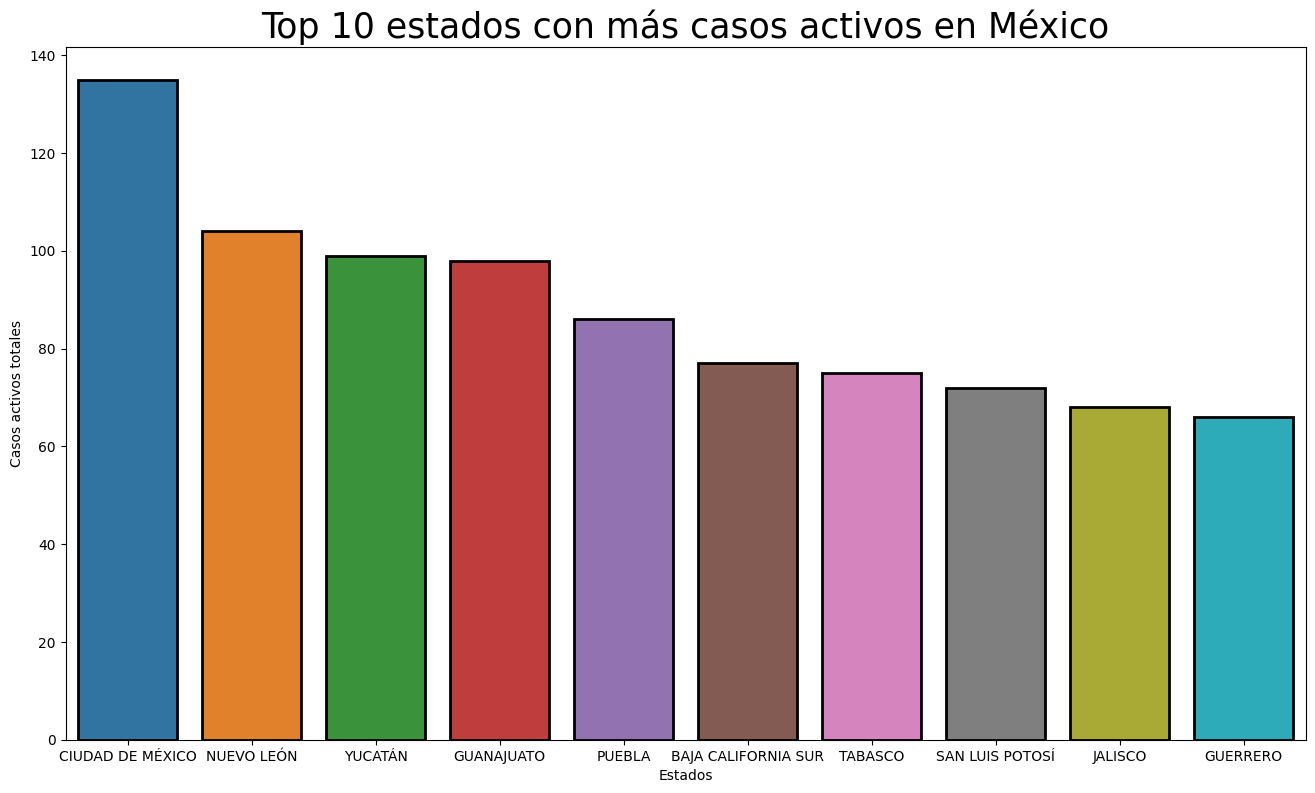

In [ ]:
# GRAFICANDO

#DEFINIENDO TAMAÑO
fig = plt.figure(figsize =(16,9))

#TÍTULO
plt.title('Top 10 estados con más casos activos en México', size = 25)

# EJES

ax = sns.barplot(data = top10.iloc[:10], y = 'Active', x= 'State', linewidth= 2, edgecolor = 'black')

# TITULOS DE EJES

plt.xlabel('Estados')
plt.ylabel('Casos activos totales')
plt.show()


In [15]:
# ESTADOS CON MÁS MUERTES

top10_muertes = covidMex.groupby(by= 'State').max()[['Deaths','Date']].sort_values(by = ['Deaths'], ascending= False).reset_index()

In [16]:
top10_muertes

,State,Deaths,Date
0,PUEBLA,42,2020-09-15
1,CIUDAD DE MÉXICO,42,2020-09-15
2,BAJA CALIFORNIA,38,2020-09-14
3,GUANAJUATO,31,2020-09-14
4,MÉXICO,30,2020-09-15
5,GUERRERO,30,2020-09-12
6,TABASCO,28,2020-09-15
7,SINALOA,25,2020-09-14
8,JALISCO,25,2020-09-15
9,SONORA,25,2020-09-12


TOP 10 ESTADOS CON MÁS MUERTES EN MÉXICO

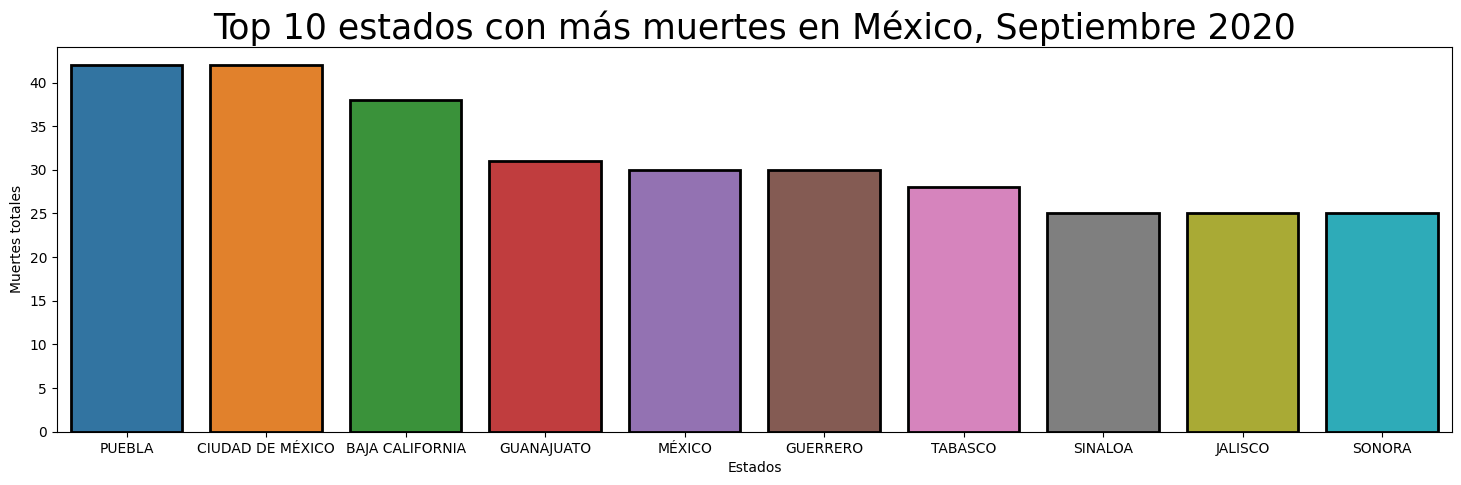

In [123]:
# GRAFICANDO

#DEFINIENDO TAMAÑO
fig = plt.figure(figsize =(18,5))

#TÍTULO
plt.title('Top 10 estados con más muertes en México, Septiembre 2020', size = 25)

# EJES

ax = sns.barplot(data = top10_muertes.iloc[:10], y = 'Deaths', x= 'State', linewidth= 2, edgecolor = 'black')

# TITULOS DE EJES

plt.xlabel('Estados')
plt.ylabel('Muertes totales')
plt.show()

In [93]:
# TASA DE RECUPERACIÓN

covidMex['Tasa_recuperación'] = (covidMex['Recovered'] * 100)/(covidMex['Confirmed'])
# TASA DE MORTALIDAD
covidMex['Tasa_mortalidad'] = (covidMex['Deaths'] * 100)/(covidMex['Confirmed'])

 TENDENCIA DE CRECIMIENTO EN MUERTES DURANTE LOS MESES DE AGOSTO Y SEPTIEMBRE 2020

In [89]:
covidMex.set_index('Date',inplace= True)

In [124]:
covidMex.index

DatetimeIndex(['2020-03-07', '2020-03-10', '2020-03-12', '2020-03-14',
               '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
               '2020-03-20', '2020-03-22',
               ...
               '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-08',
               '2020-09-09', '2020-09-10', '2020-09-11', '2020-09-12',
               '2020-09-13', '2020-09-14'],
              dtype='datetime64[ns]', name='Date', length=92320, freq=None)

In [121]:
agg_dict = {
    'Tasa_recuperación': 'mean',
    'Tasa_mortalidad': 'mean'
}

covidMexRes = covidMex.resample('M').agg(agg_dict)

In [122]:
covidMexRes

,Tasa_recuperación,Tasa_mortalidad
Date,,
2020-01-31,100.000000,0.000000
2020-02-29,86.666667,13.333333
2020-03-31,83.843729,16.156271
2020-04-30,77.718148,22.281852
2020-05-31,82.381545,17.618455
2020-06-30,85.728114,14.271886
2020-07-31,87.262547,12.737453
2020-08-31,90.699111,9.300889
2020-09-30,10.798204,2.810433


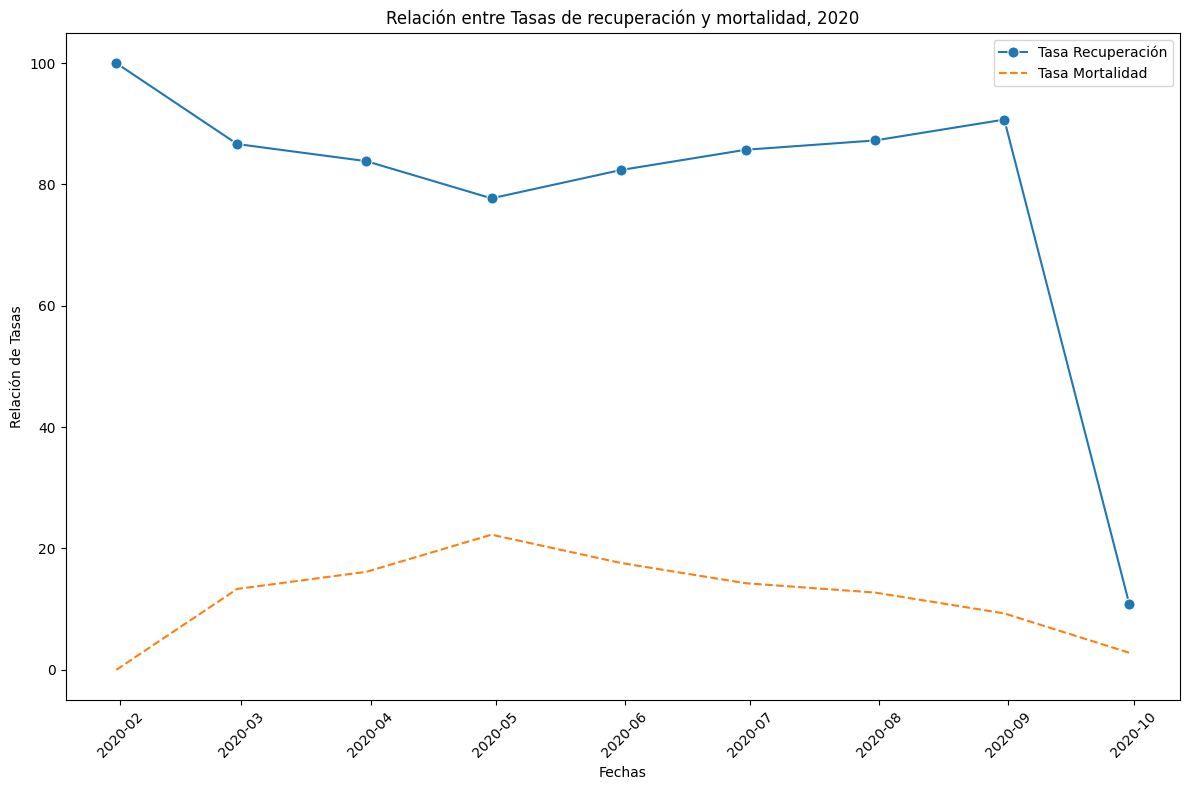

In [132]:
# Crear un lineplot con Seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=covidMexRes, x=covidMexRes.index, y='Tasa_recuperación',label='Tasa Recuperación', marker='o', markersize=8)

# Agregar las líneas para la segunda tasa
sns.lineplot(data=covidMexRes, x=covidMexRes.index, y='Tasa_mortalidad', label='Tasa Mortalidad', linestyle='dashed')

# Configurar etiquetas y leyenda
plt.xlabel('Fechas')
plt.ylabel('Relación de Tasas')
plt.title('Relación entre Tasas de recuperación y mortalidad, 2020')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()







AHORA POR ESTADO

In [142]:
a = statewise.sort_values(by='Tasa_recuperación', ascending = False)[:10]
b = statewise.sort_values(by='Tasa_mortalidad', ascending = False)[:10]

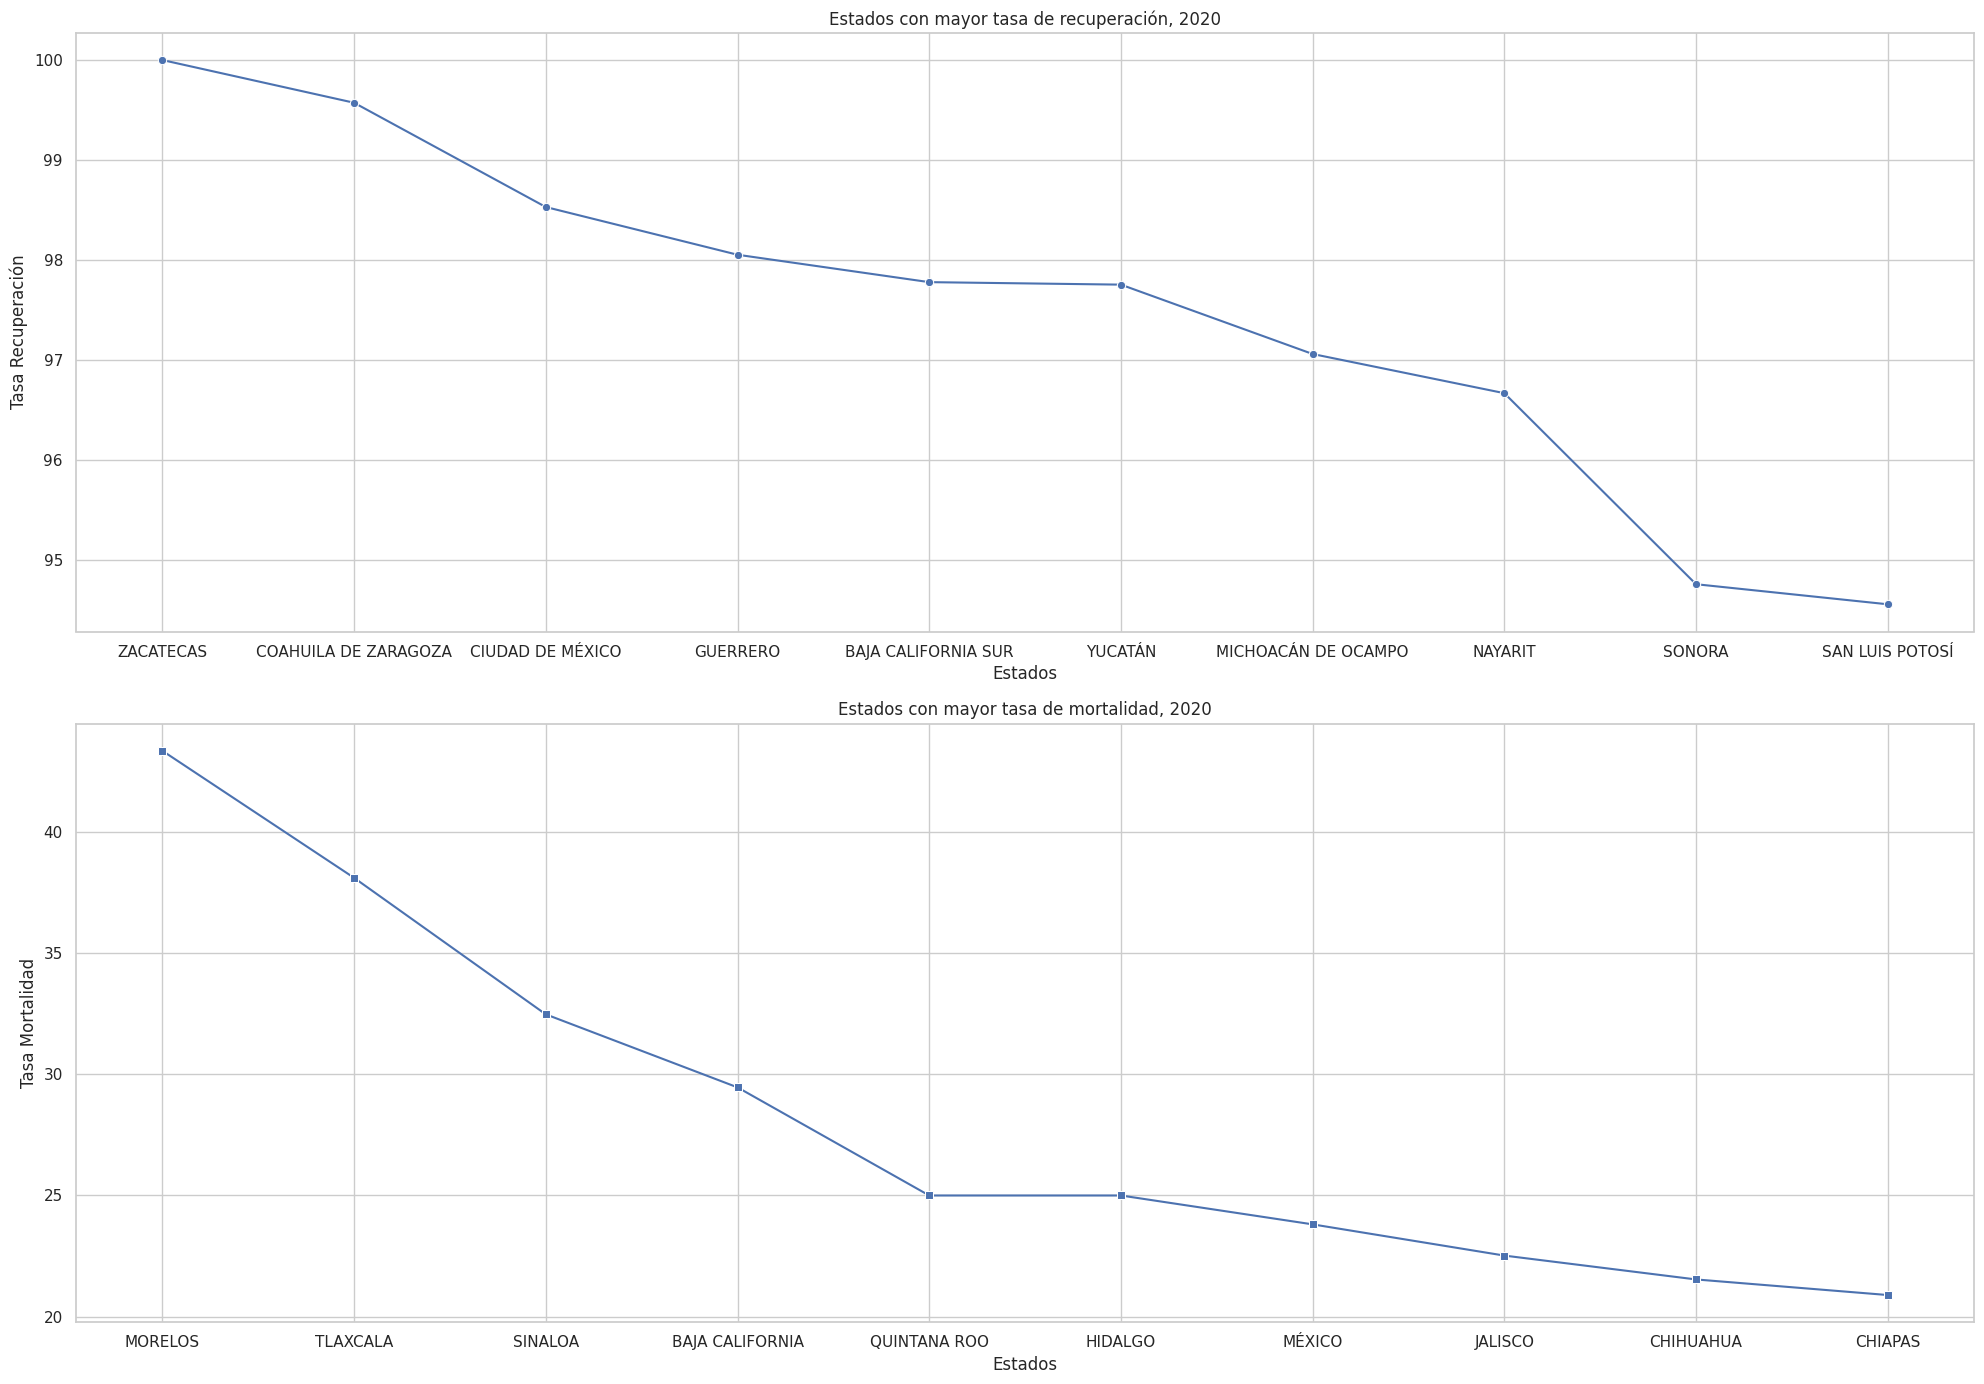

In [147]:
# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Crear subtramas
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 14))

# Primer gráfico de líneas
sns.lineplot(data=a, x=a.index, y='Tasa_recuperación', ax=ax1, marker='o')
ax1.set_xlabel('Estados')
ax1.set_ylabel('Tasa Recuperación')
ax1.set_title('Estados con mayor tasa de recuperación, 2020')

# Segundo gráfico de líneas
sns.lineplot(data=b, x=b.index, y='Tasa_mortalidad', ax=ax2, marker='s')
ax2.set_xlabel('Estados')
ax2.set_ylabel('Tasa Mortalidad')
ax2.set_title('Estados con mayor tasa de mortalidad, 2020')

# Ajustar diseño de las subtramas
plt.tight_layout()

# Mostrar los gráficos
plt.show()

## ANÁLISIS DEL DATASET "VACCINE"

In [148]:
vaccine.columns

Index(['location', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'daily_vaccinations_per_million', 'daily_people_vaccinated',
       'daily_people_vaccinated_per_hundred'],
      dtype='object')

In [149]:
vaccine = vaccine.drop(['iso_code','total_boosters','daily_vaccinations_raw',
              'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
              'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
              'daily_vaccinations_per_million','daily_people_vaccinated_per_hundred'], axis= 1)


In [150]:
vaccine.rename(columns = {'date': 'Vaccine_Date'}, inplace =  True)

In [151]:
vaccine['Vaccine_Date'] = pd.to_datetime(vaccine['Vaccine_Date'], format= '%Y-%m-%d')

In [152]:
vaccine

,location,Vaccine_Date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,daily_people_vaccinated
0,Afghanistan,2021-02-22,0.0,0.0,NaN,NaN,NaN
1,Afghanistan,2021-02-23,NaN,NaN,NaN,1367.0,1367.0
2,Afghanistan,2021-02-24,NaN,NaN,NaN,1367.0,1367.0
3,Afghanistan,2021-02-25,NaN,NaN,NaN,1367.0,1367.0
4,Afghanistan,2021-02-26,NaN,NaN,NaN,1367.0,1367.0
...,...,...,...,...,...,...,...
176499,Zimbabwe,2022-10-05,12219760.0,6436704.0,4750104.0,2076.0,638.0
176500,Zimbabwe,2022-10-06,NaN,NaN,NaN,1714.0,563.0
176501,Zimbabwe,2022-10-07,NaN,NaN,NaN,1529.0,462.0
176502,Zimbabwe,2022-10-08,NaN,NaN,NaN,1344.0,361.0


In [153]:
vaccine.isnull().sum()

location                        0
Vaccine_Date                    0
total_vaccinations          99066
people_vaccinated          102349
people_fully_vaccinated    105794
daily_vaccinations           1517
daily_people_vaccinated      1508
dtype: int64

In [159]:
paisPivot = pd.pivot_table(vaccine, values = ['total_vaccinations','people_vaccinated','daily_vaccinations'],
                           index= 'location').round().sort_values(by='total_vaccinations', ascending=False).reset_index()

In [160]:
paisPivot

,location,daily_vaccinations,people_vaccinated,total_vaccinations
0,World,13863138.0,3.912908e+09,8.760475e+09
1,Asia,9443642.0,2.627479e+09,5.978653e+09
2,Upper middle income,5648180.0,1.565580e+09,3.792176e+09
3,Lower middle income,5284698.0,1.544912e+09,3.074607e+09
4,China,4440022.0,1.258065e+09,2.522480e+09
...,...,...,...,...
230,Montserrat,7.0,1.637000e+03,3.293000e+03
231,Niue,9.0,1.088000e+03,2.598000e+03
232,Tokelau,10.0,1.158000e+03,2.372000e+03
233,Falkland Islands,75.0,1.778000e+03,2.360000e+03


In [161]:
paisPivot.groupby('location')['total_vaccinations'].sum().sort_values(ascending= False).to_frame()

,total_vaccinations
location,
World,8.760475e+09
Asia,5.978653e+09
Upper middle income,3.792176e+09
Lower middle income,3.074607e+09
China,2.522480e+09
...,...
Montserrat,3.293000e+03
Niue,2.598000e+03
Tokelau,2.372000e+03


In [164]:
ind = [1,7,8,9,10,12,37]

bar = paisPivot.loc[ind].sort_values(by = 'total_vaccinations',ascending= False)

In [165]:
bar

,location,daily_vaccinations,people_vaccinated,total_vaccinations
1,Asia,9443642.0,2.627479e+09,5.978653e+09
7,Europe,1422948.0,4.080475e+08,9.750110e+08
8,North America,1194638.0,3.563458e+08,8.032318e+08
9,European Union,971594.0,2.703321e+08,6.683559e+08
10,South America,1008392.0,2.820916e+08,6.423899e+08
12,Africa,912454.0,2.699950e+08,4.216101e+08
37,Oceania,99923.0,2.178255e+07,5.361515e+07


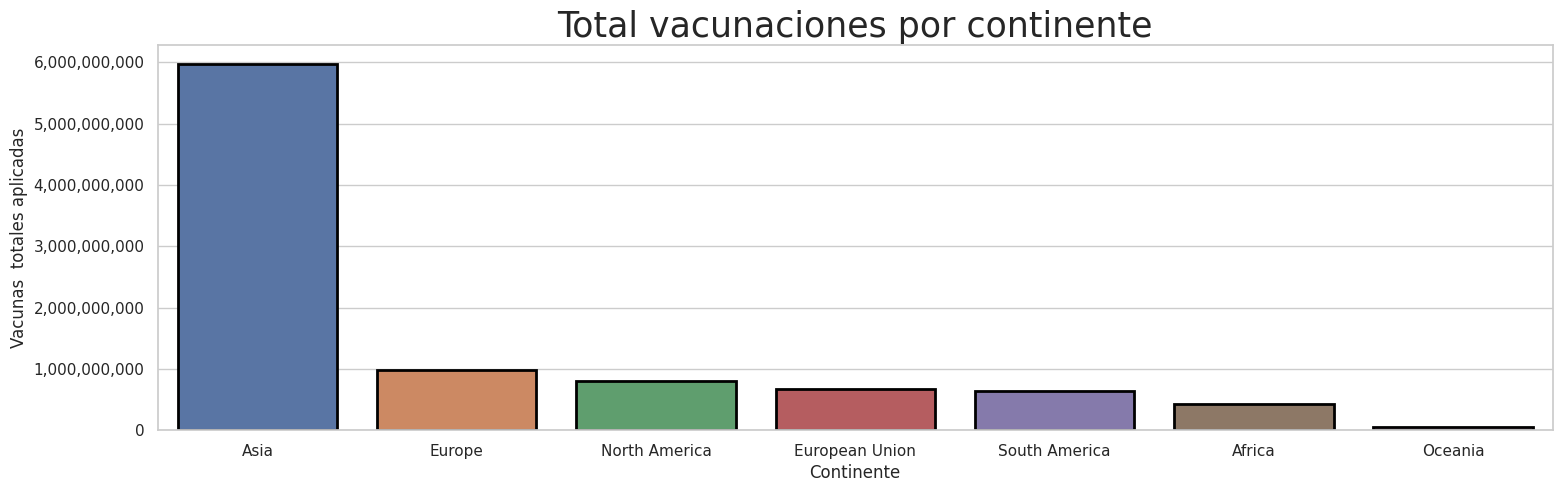

In [166]:
from matplotlib.ticker import ScalarFormatter
# GRAFICANDO

#DEFINIENDO TAMAÑO
fig = plt.figure(figsize =(18,5))

#TÍTULO
plt.title('Total vacunaciones por continente', size = 25)

# EJES

ax = sns.barplot(data = bar, y ='total_vaccinations' , x='location' , linewidth= 2, edgecolor = 'black')

# TITULOS DE EJES

plt.xlabel('Continente')
plt.ylabel('Vacunas  totales aplicadas')

#ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
# Ajustar límites del eje y automáticamente
#ax.autoscale(enable=True, axis='y')
#ax.ticklabel_format(style='plain')

ax.set_yticks(ax.get_yticks()[:-1], [f"{int(x):,}" for x in ax.get_yticks()[:-1]]);


plt.show()

In [167]:
paisPivot.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   location            235 non-null    object 
 1   daily_vaccinations  235 non-null    float64
 2   people_vaccinated   235 non-null    float64
 3   total_vaccinations  235 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.5+ KB


In [168]:
ind2 = [0,1,2,3,5,7,8,9,10,12,18,37]

paisPivot = paisPivot.drop(paisPivot.index[ind2])

paisPivot

,location,daily_vaccinations,people_vaccinated,total_vaccinations
4,China,4440022.0,1.258065e+09,2.522480e+09
6,India,2365703.0,7.675323e+08,1.481964e+09
11,United States,771668.0,2.140097e+08,4.718461e+08
13,Brazil,612650.0,1.343343e+08,2.905069e+08
14,Japan,474344.0,8.480036e+07,2.315778e+08
...,...,...,...,...
230,Montserrat,7.0,1.637000e+03,3.293000e+03
231,Niue,9.0,1.088000e+03,2.598000e+03
232,Tokelau,10.0,1.158000e+03,2.372000e+03
233,Falkland Islands,75.0,1.778000e+03,2.360000e+03


In [169]:
max_vac = paisPivot.groupby('location')['total_vaccinations'].sum().to_frame('total_vaccinations')

max_vac

,total_vaccinations
location,
Afghanistan,9540064.0
Albania,1389956.0
Algeria,10657045.0
Andorra,89228.0
Angola,12513246.0
...,...
Wales,5883536.0
Wallis and Futuna,10292.0
Yemen,764752.0


In [170]:
max_vac = max_vac.sort_values('total_vaccinations', ascending= False)[:5]

In [171]:
max_vac

,total_vaccinations
location,
China,2.522480e+09
India,1.481964e+09
United States,4.718461e+08
Brazil,2.905069e+08
Japan,2.315778e+08


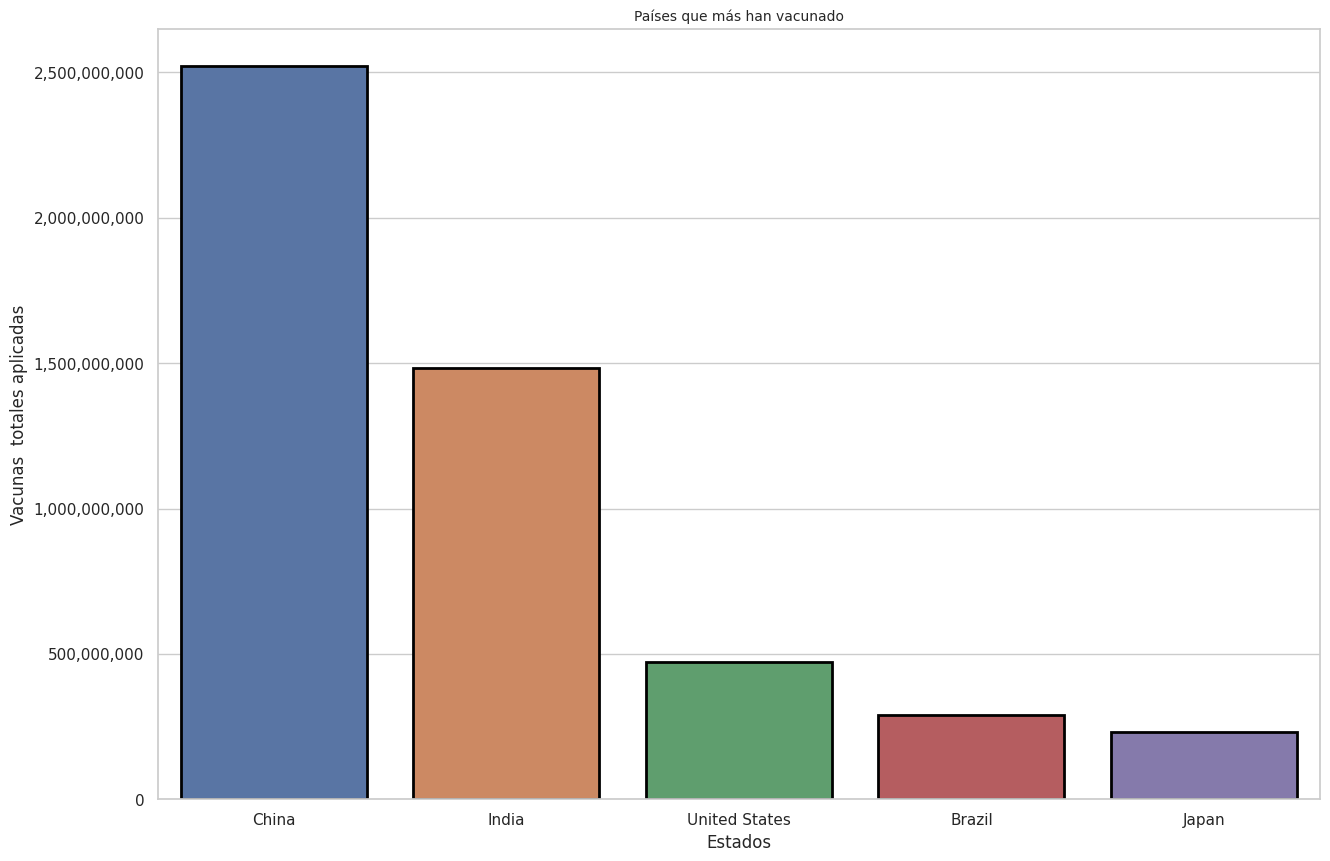

In [174]:
#DEFINIENDO TAMAÑO
fig = plt.figure(figsize =(15,10))

#TÍTULO
plt.title('Países que más han vacunado', size = 10)

# EJES

ax = sns.barplot(data = max_vac, y ='total_vaccinations' , x=max_vac.index , linewidth= 2, edgecolor = 'black')

# TITULOS DE EJES

plt.xlabel('Estados')
plt.ylabel('Vacunas  totales aplicadas')

#ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
# Ajustar límites del eje y automáticamente
#ax.autoscale(enable=True, axis='y')
#ax.ticklabel_format(style='plain')

ax.set_yticks(ax.get_yticks()[:-1], [f"{int(x):,}" for x in ax.get_yticks()[:-1]]);


plt.show()